In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
%matplotlib inline


In [2]:
data = load_iris()
iris = pd.DataFrame(data.data, columns=data.feature_names)
iris['class'] = data.target
iris['class'] = iris['class'].astype('category')
iris['class'].cat.categories = data.target_names
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
def compare_models(m1, m2):
    f = plt.figure(figsize=(20,18))
    ax = f.add_subplot(221)
    tree.plot_tree(m1.fit(X, Y), class_names=data.target_names, feature_names=data.feature_names, filled=True, node_ids=True, rounded=True, ax= ax, fontsize=15)
    ax2 = f.add_subplot(222)
    tree.plot_tree(m2.fit(X, Y),class_names=data.target_names, feature_names=data.feature_names, filled=True, node_ids=True, rounded=True, ax= ax2, fontsize=15)

In [4]:
X = iris.iloc[:,:4]
Y = iris.loc[:, 'class']

In [5]:
model = DecisionTreeClassifier(criterion='gini', max_depth=3, splitter='best')
model.fit(X, Y)
y_pred = model.predict(X)
print ("Accuracy Score : ", accuracy_score(Y,y_pred)*100) 

Accuracy Score :  97.33333333333334


In [6]:
model2 = DecisionTreeClassifier(criterion='gini', max_depth=5, splitter='best', min_samples_split=50, 
                                min_samples_leaf= 20, min_impurity_split=0.1)
model2.fit(X, Y)
y_pred2 = model2.predict(X)
print ("Accuracy Score 2 : ", accuracy_score(Y,y_pred2)*100) 

Accuracy Score 2 :  96.0


c:\users\edwinvivekn\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


c:\users\edwinvivekn\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


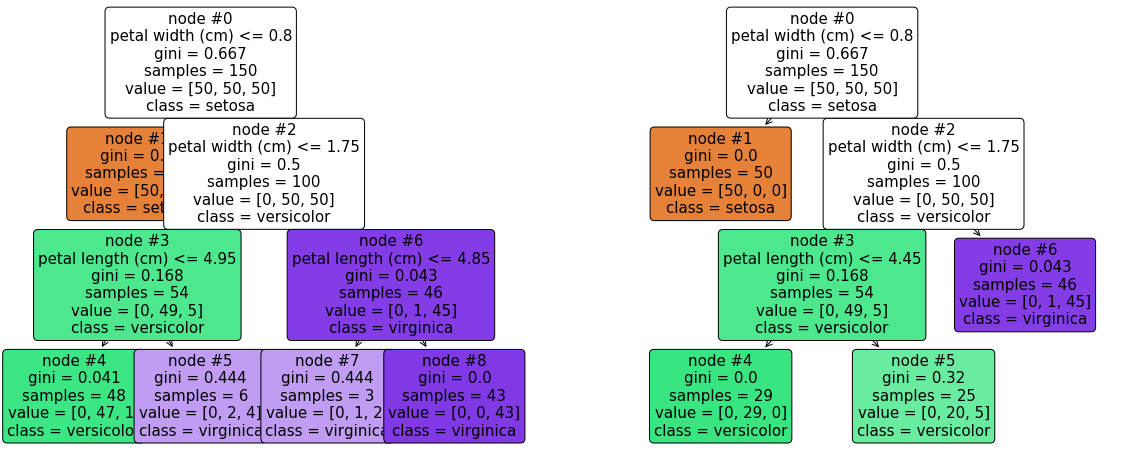

In [7]:
compare_models(model, model2)

In [8]:
#post pruning using Cross validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores, cv_scores_list

def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

In [9]:
# fitting trees of depth 1 to 5
sm_tree_depths = range(1,6)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, sm_cv_scores_list = run_cross_validation_on_trees(X, Y, 
                                                                                        sm_tree_depths)

print(sm_accuracy_scores)
print(sm_cv_scores_mean)
print(sm_cv_scores_list)

[0.66666667 0.96       0.97333333 0.99333333 1.        ]
[0.66666667 0.93333333 0.97333333 0.96       0.96666667]
[array([0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667]), array([0.93333333, 0.96666667, 0.9       , 0.86666667, 1.        ]), array([0.96666667, 0.96666667, 0.93333333, 1.        , 1.        ]), array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ]), array([0.96666667, 0.96666667, 0.9       , 1.        , 1.        ])]


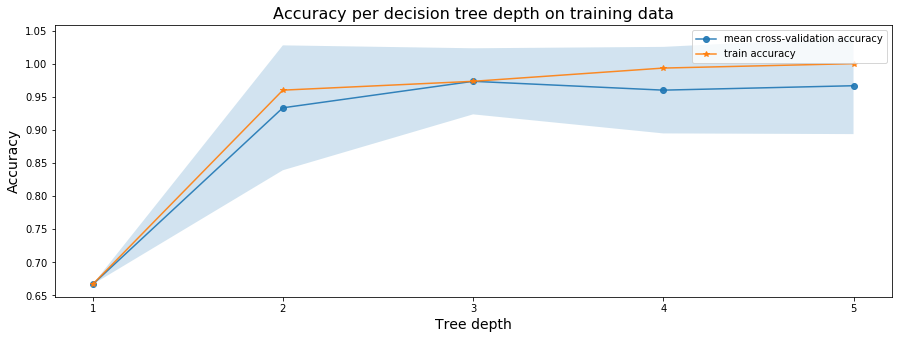

In [10]:
# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

In [11]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))


The depth-3 tree achieves the best mean cross-validation accuracy 97.33333 +/- 2.49444% on training dataset


In [23]:
#Grid search CV
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':range(1,6)}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) #cross validation
gridcv = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=5, cv=cv)
gridcv.fit(X, Y)
modelcv = gridcv.best_estimator_
print (gridcv.best_score_, gridcv.best_params_) 

0.9466666666666668 {'max_depth': 3}
